In [1]:
from matplotlib import rc
# rc('text', usetex=True)

import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

/Users/junyoungpark/.pyenv/versions/3.7.5/envs/torch/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_excel('random_mtsp.xls')

In [3]:
or_tools = df.iloc[:,1]
def parse_data(sub_df):
    data = []
    for datum in sub_df:
        try:
            perfs = [float(s) for s in re.findall("([0-9]+[,.]+[0-9]+)", datum)]
            data.append(perfs)
        except:
            pass
    return np.stack(data)

In [31]:
targer_index = 1 # 0: max makespan 1: mean makespan 2: mean util
data_cols = [2, 1, 4, 5, 6,7]
ad = []
for data_col in data_cols:
    alog_results = df.iloc[:,data_col]
    alog_perfs = parse_data(alog_results)[:, targer_index]
    ad.append(alog_perfs)

In [32]:
aggregated_data = np.stack(ad).T # map size x algos

algos = ['ScheduleNet', 'OR-tools', 'FI', 'NI', 'NN', 'RI']
sizes = ['30x3','50x5','75x7','100x10','200x(20~30)','500x(30~50)','750x(30~50)']
sizes_latex = [r'$30 \times 3$', 
               r'$50 \times 5$',
               r'$75 \times 7$',
               r'$100 \times 10$',
               r'$200 \times (20 \sim 30)$', 
               r'$500 \times (30 \sim 50)$', 
               r'$750 \times (30 \sim 50)$'] 

aggregated_df = pd.DataFrame(aggregated_data,
                             index=sizes,
                             columns=algos)

In [34]:
# alpha = 1.0
# bar_width = 0.15
# colors = []

# fig, ax = plt.subplots(1,1, figsize=(10,5))
# for i, algo_name in enumerate(algos):  
#     bar = ax.bar(np.arange(len(sizes)) + bar_width * i,
#                  aggregated_data[:, i], 
#                  bar_width,
#                  alpha=alpha,
#                  label=algo_name)
# #     ax.set_xticklabels(sizes)
# fig.legend()

In [35]:
def annotate_label(bar, value, size):
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(value),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -20),  # 3 points vertical offset
                size=size,
                textcoords="offset points",
                ha='center', va='bottom')

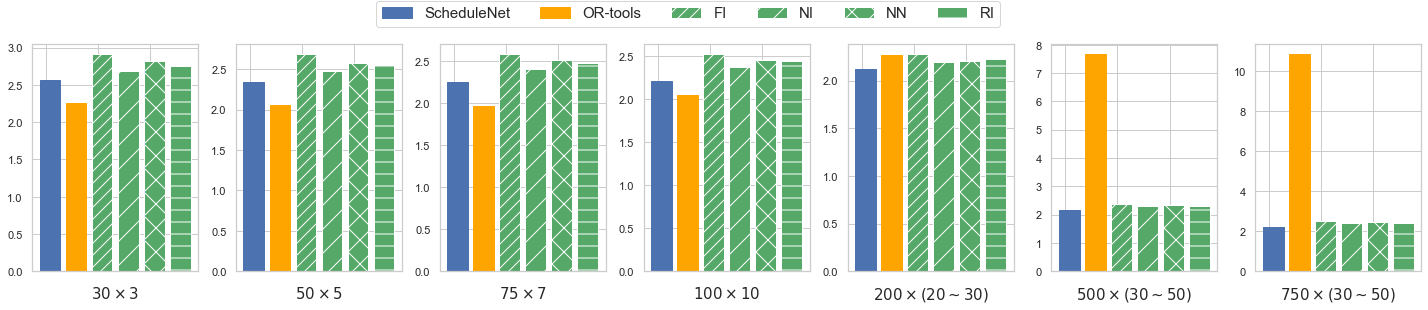

In [37]:
import seaborn as sns
sns.set_style("whitegrid")

alpha = 1.0
bar_width = 0.15
colors = ['b','orange','g','g','g','g']
hatchs = [None, None ,'//', '/', 'x', '-']

norm = False
sharey = False 
sharey = sharey if not norm else True
cutoff_val = 1.5
cutoff_outlier = True

x_label_size = 15
annote_size = 14

fig, axes = plt.subplots(1,len(sizes_latex), figsize=(20,4), sharey=sharey)
for i, (size, ax) in enumerate(zip(sizes_latex, axes)):
    if norm:
        viz_data = aggregated_data[i, :] / aggregated_data[i, 0]
        or_tools_perf = viz_data[1]
        if cutoff_outlier:
            viz_data = viz_data.clip(0.0, cutoff_val)
    else:
        viz_data = aggregated_data[i, :]
    
    bar_list = ax.bar(np.arange(len(algos)) + bar_width, viz_data,
                      alpha=alpha, color='g')
    ax.set_xlabel(size, size=x_label_size)
    ax.set_xticklabels([])
    if norm:
        if i >=5:
            annotate_label(bar_list[1], or_tools_perf, annote_size)

        ax.set_ylim(0.0, 1.5)


    for ii, c in enumerate(colors):
        if ii >= 2:
            bar_list[ii].set_hatch(hatchs[ii])
        else:
            bar_list[ii].set_color(c)

fig.legend(bar_list, algos, ncol=len(algos), bbox_to_anchor=(0.7, 1.10), fontsize=15)    
fig.tight_layout()